Uploading all needed libriries for all compared models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import itertools
from mlxtend.preprocessing import shuffle_arrays_unison
from mlxtend.plotting import plot_decision_regions

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm

In [ ]:
pip install numpy pandas scikit-learn tensorflow

Dataset Exploration

In [ ]:
!kaggle datasets download -d gaurav2022/mobile-health

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
 79% 28.0M/35.5M [00:00<00:00, 81.2MB/s]
100% 35.5M/35.5M [00:00<00:00, 88.3MB/s]


In [ ]:
!unzip mobile-health.zip

Archive:  mobile-health.zip
  inflating: mhealth_raw_data.csv    


In [ ]:
# Load the dataset
url = '/content/mhealth_raw_data.csv'  # Replace this with the path to your downloaded CSV file
data = pd.read_csv(url)

# Display dataset information to understand its structure
print(data.head())
print(data['Activity'].value_counts())

      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1  
Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count

In [ ]:
# Assuming 'activity' is the column with the class labels(Target)
classes = data['Activity'].unique()
sampled_data = pd.DataFrame()

for activity in classes:
    activity_data = data[data['Activity'] == activity]
    sampled = activity_data.sample(n=3000, random_state=42)  # Ensure there are at least 500 samples per class
    sampled_data = pd.concat([sampled_data, sampled])

# Reset index
sampled_data.reset_index(drop=True, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sampled_data=sampled_data.drop('subject', axis=1)
# Separate features and target
X = sampled_data.drop('Activity', axis=1)
y = sampled_data['Activity']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


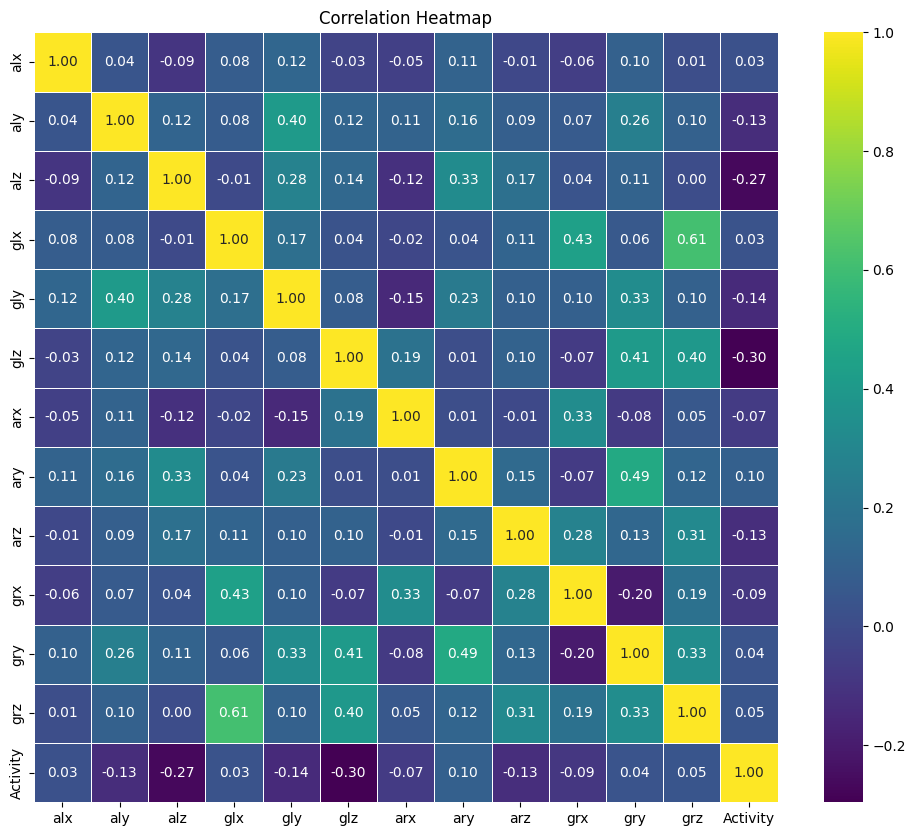

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = sampled_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Models Training
- KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors

}

# Create KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Predict using the best model
best_knn_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, best_knn_pred)
print("Best KNN Accuracy:", accuracy)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, best_knn_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, best_knn_pred)

# Calculate precision
precision = precision_score(y_test, best_knn_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, best_knn_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, best_knn_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Parameters: {'n_neighbors': 3}
Best KNN Accuracy: 0.925
Confusion Matrix:
[[332  16  16   7  48  50  34  35  35  26  10   5   8]
 [  0 601   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0 610   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 558   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0 619   1   0   0   0   0   0   0   3]
 [ 25   0   0   0  24 549   5   0   9   0   1   1   0]
 [  1   1   0   0   0   0 560   5   0   0   0   0   0]
 [  4   0   0   0   0   0   4 628   0   0   0   0   0]
 [  1   0   0   0   2   0   6   3 563   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0 603   0   0   0]
 [  4   0   1   0   2   3   0   0   1   0 532  20   4]
 [  5   0   0   0   0   1   0   0   0   0  45 544   7]
 [ 23   0   0   0   6   3   1   0   0   0  43  16 516]]
Accuracy: 0.925
Precision: 0.9228480502073162
Recall: 0.925
F1-score: 0.920721986741496


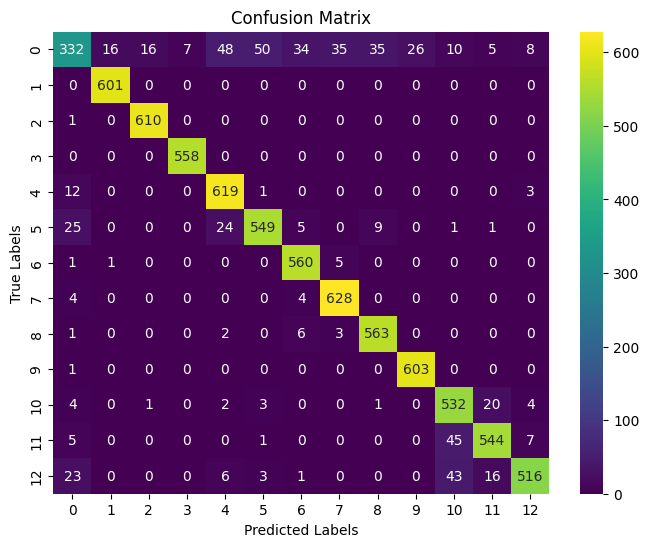

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-validation Score:", mean_cv_score)
print("Standard Deviation of Cross-validation Score:", std_cv_score)


Cross-validation scores: [0.91762821 0.92051282 0.91858974 0.91522436 0.91522436]
Mean Cross-validation Score: 0.9174358974358974
Standard Deviation of Cross-validation Score: 0.0020306453924945



- logistic regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))

precision = precision_score(y_test, log_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, log_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, log_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, log_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("\nCross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-validation Score:", mean_cv_score)
print("Standard Deviation of Cross-validation Score:", std_cv_score)

Logistic Regression Accuracy: 0.5574358974358974
Confusion Matrix:
[[ 31  65  74  14  55  14  79  58  70  44  43  30  45]
 [  0 396   0   0  68   0 113   0  24   0   0   0   0]
 [ 66   0 380   0   0  61   0  45   0  51   0   6   2]
 [  0   0   0 558   0   0   0   0   0   0   0   0   0]
 [ 22  69   2   0 344  39  44   2  82   0   1  12  18]
 [ 62  40  27   7 104 195  50  17  72  13   7   5  15]
 [ 31  80   0   0  17   1 371   3  63   1   0   0   0]
 [ 15  63  49  11  20   0  47 371   5  42   0   4   9]
 [ 17  24   0   0  38  37  88   0 338   1  14   4  14]
 [  2   0   1   0   2   0   0  11  42 543   0   0   3]
 [  7   0  30   1   6   7   2   3   5   0 307 104  95]
 [ 18   0  66   7  18  31  11   6   7   2  55 340  41]
 [ 24   7  52   1  24   4  30  40  14  12 128  98 174]]
Accuracy: 0.925
Precision: 0.5362935897232156
Recall: 0.5574358974358974
F1-score: 0.540056840902262

Cross-validation scores: [0.55560897 0.56025641 0.55544872 0.56009615 0.55496795]
Mean Cross-validation Score: 0.55

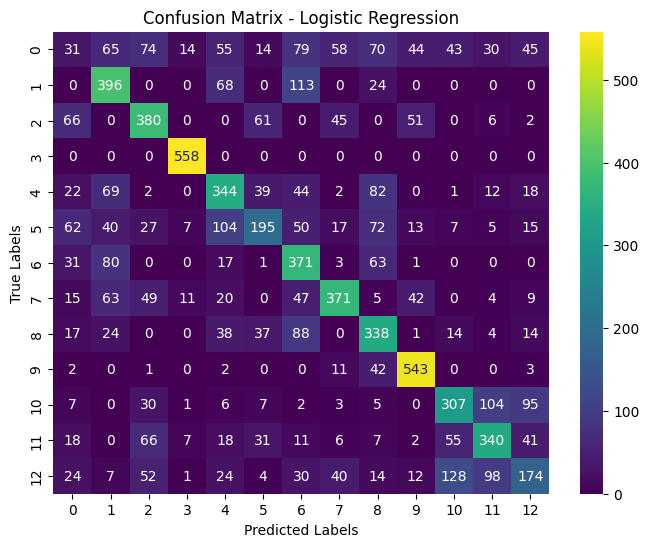

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


- Support Vector Machine (SVM)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Example values for C and gamma
C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]

for C in C_values:
    for gamma in gamma_values:
        # Initialize SVM classifier
        svm = SVC(kernel='rbf', C=C, gamma=gamma)

        # Fit the model
        svm.fit(X_train, y_train)

        # Make predictions
        svm_pred = svm.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, svm_pred)

        # Calculate precision
        precision = precision_score(y_test, svm_pred, average='weighted')

        # Calculate recall
        recall = recall_score(y_test, svm_pred, average='weighted')

        # Calculate F1-score
        f1 = f1_score(y_test, svm_pred, average='weighted')

        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, svm_pred)

        print(f"SVM Metrics with C={C} and gamma={gamma}:")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("\n")


SVM Metrics with C=0.1 and gamma=0.01:
Confusion Matrix:
[[114 105  66   8  51  46  42  41  42  45  23  18  21]
 [  0 582   0   0   0   0  19   0   0   0   0   0   0]
 [  0   0 554   0   0  57   0   0   0   0   0   0   0]
 [  0   0   0 558   0   0   0   0   0   0   0   0   0]
 [  2  62   3   0 403  81  24   0  38   0   8   4  10]
 [  7  21   4   0  99 348  23   1  98   2   3   2   6]
 [  4 109   2   0   6   3 430   3  10   0   0   0   0]
 [ 10  55  16   0   8   0  28 518   1   0   0   0   0]
 [  1  92   0   0   7  26  39   1 403   5   0   1   0]
 [  8   0   9   0   2   8   1  16   1 555   0   0   4]
 [ 12   0   1   1   6   5   0   3   1   0 409 100  29]
 [  7   0   1   0   5   2   0   2   0   0  83 476  26]
 [  8   0   3   2   3  10   1   0   0   0  54 101 426]]
Accuracy: 0.7405128205128205
Precision: 0.7463354569394338
Recall: 0.7405128205128205
F1-score: 0.7275947528124738


SVM Metrics with C=0.1 and gamma=0.1:
Confusion Matrix:
[[134  56  21   7  43  34  37  31  38  34 186   0   1]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics with C=0.1 and gamma=1:
Confusion Matrix:
[[  8  18  13   4   1   0   6   3  12   0 557   0   0]
 [  0 600   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0 610   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0 558   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  30   0   0   0   0   0 605   0   0]
 [  0   0   0   0   1   3   0   0   1   0 609   0   0]
 [  1   5   0   0   0   0 168   0   2   0 391   0   0]
 [  0   1   0   0   0   0   2  80   5   0 548   0   0]
 [  0   2   0   0   0   0   0   0  69   0 504   0   0]
 [  0   0   0   0   0   0   0   0   0   0 604   0   0]
 [  0   0   0   0   0   0   0   0   0   0 567   0   0]
 [  0   0   0   0   0   0   0   0   0   0 602   0   0]
 [  0   0   0   0   0   0   0   0   0   0 608   0   0]]
Accuracy: 0.34525641025641024
Precision: 0.6599979432728291
Recall: 0.34525641025641024
F1-score: 0.3139061806734631


SVM Metrics with C=1 and gamma=0.01:
Confusion Matrix:
[[177  73  38   8  62  43  41  39  46  43  23  12  17]
 

- linear regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'Activity' is the column with the class labels
classes = sampled_data['Activity'].unique()
sampled_data.reset_index(drop=True, inplace=True)

# Separate features and target
X = sampled_data.drop('Activity', axis=1)
y = sampled_data['Activity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply linear regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Alternatively, calculate Root Mean Squared Error (RMSE)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)


print("Train Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)


Train Mean Squared Error (MSE): 10.51098192548758
Test Mean Squared Error (MSE): 10.82893266998905
Train Root Mean Squared Error (RMSE): 3.242064454246334
Test Root Mean Squared Error (RMSE): 3.2907343663670345


- Neural Network (NN)

In [ ]:
!pip install tensorflow keras


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_moons

%matplotlib inline

# sns.pairplot(df, hue="Species", size= 2.5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(units=32, input_shape=(X_train.shape[1],)),
    ReLU(),
    Dropout(0.25),
    Dense(units=64),
    LeakyReLU(),
    Dropout(0.25),
    Dense(units=len(classes), activation="softmax")
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

# Print model summary
model.summary()

# Train the model for 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 13)                8

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

# Train the MLP classifier
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy (Neural Network):", accuracy_mlp)

Accuracy (Neural Network): 0.9220512820512821
